In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_5164\1994242243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

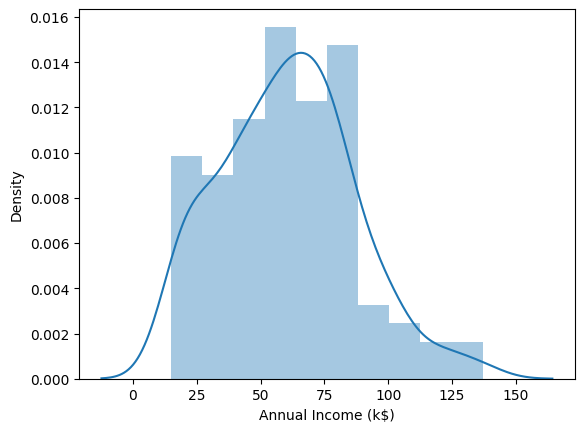

In [7]:
sns.distplot(df['Annual Income (k$)'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5164\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

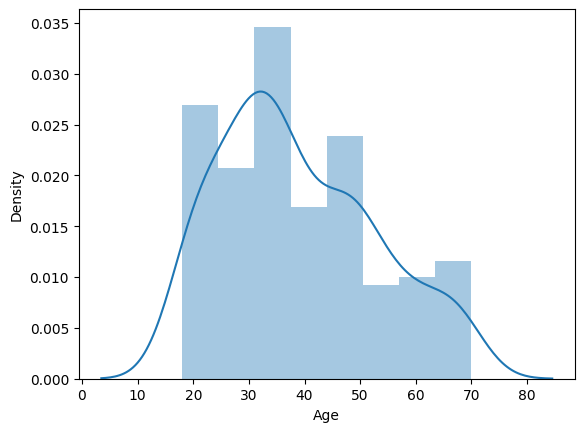

In [8]:
sns.distplot(df['Age'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5164\3737231236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

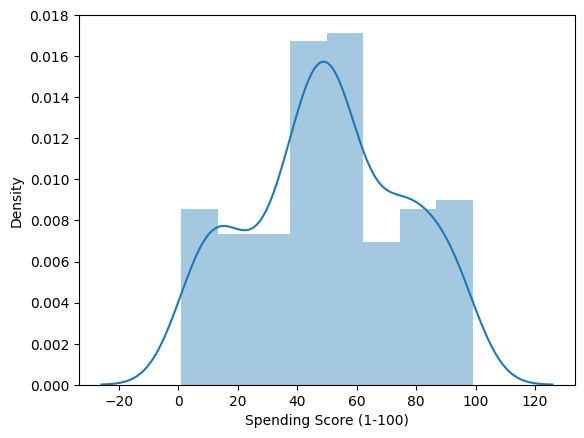

In [9]:
sns.distplot(df['Spending Score (1-100)'])

In [11]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [12]:
#Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

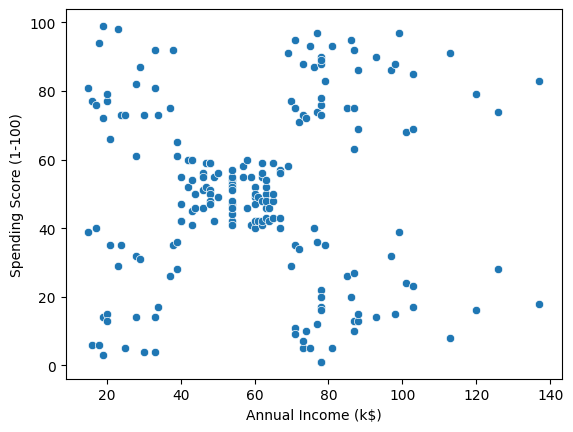

In [13]:
sns.scatterplot(data=df, x='Annual Income (k$)', y = 'Spending Score (1-100)')

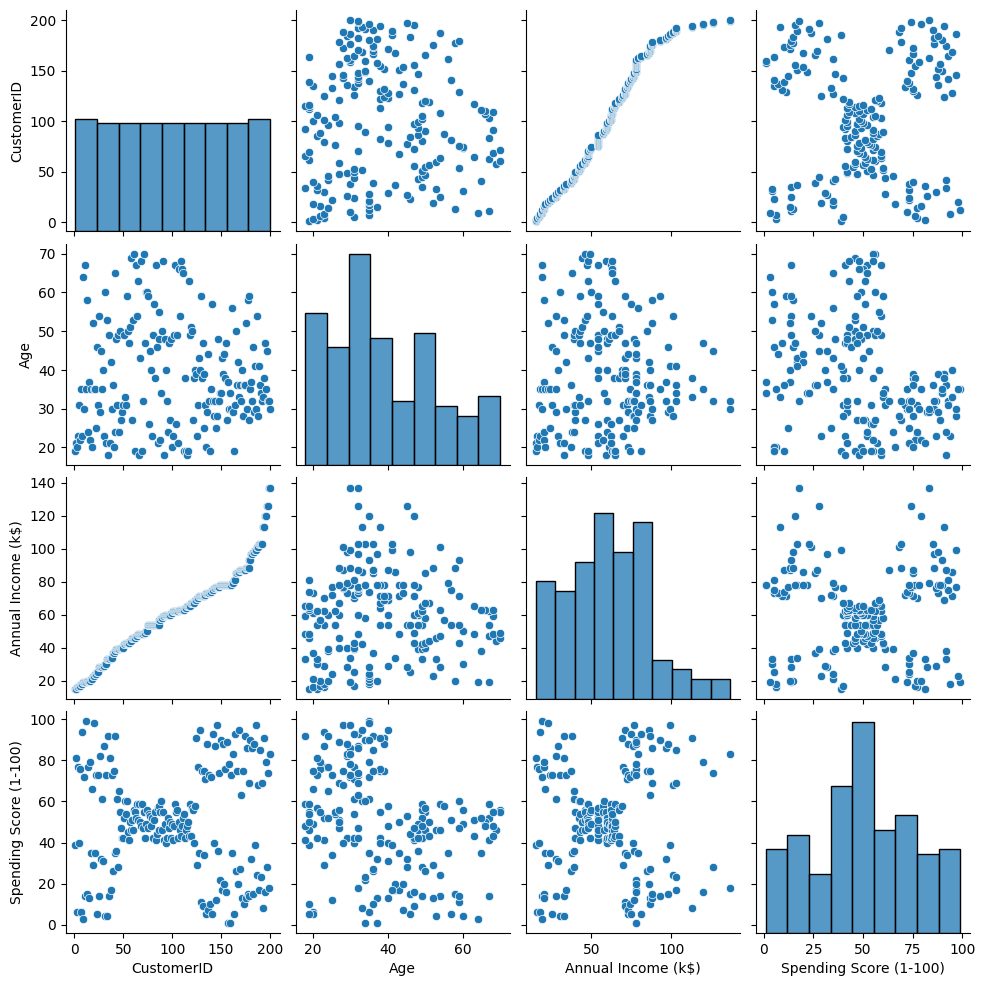

In [14]:
sns.pairplot(df)

In [16]:
#Univariate Clustering

In [18]:
clustering_1= KMeans()
clustering_1.fit(df[['Annual Income (k$)']])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [22]:
df['Income Cluster'] = clustering_1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

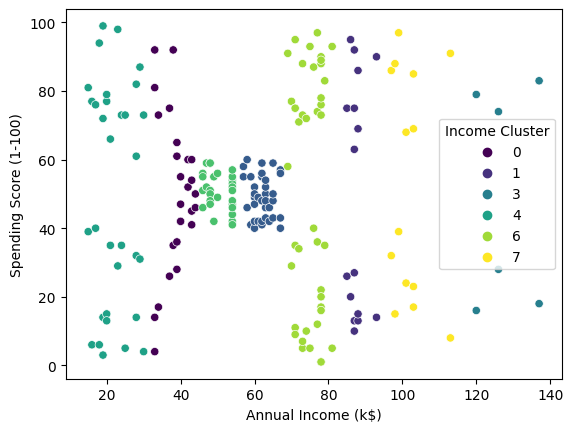

In [23]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income Cluster', data=df, palette='viridis')


In [25]:
clustering_1.inertia_
#Inertia measures how well a dataset was clustered by K-Means., which should be relatively low in a good K-Means cluster 

2822.4996947496966

In [32]:
from sklearn.metrics import silhouette_score

inertia_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    sil = silhouette_score(df[['Annual Income (k$)']], kmeans.labels_)
    inertia_scores.append((kmeans.inertia_,i,sil))

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

In [33]:
inertia_scores

[(48660.888888888876, 2, 0.5622996282314814),
 (23528.15217391306, 3, 0.5611617257307787),
 (13278.112713472483, 4, 0.5584977520656282),
 (8481.49619047619, 5, 0.5836461109257968),
 (5081.484660267268, 6, 0.6016527991635554),
 (3931.9880952380945, 7, 0.6143340926557819),
 (2822.4996947496966, 8, 0.6092272654893595),
 (2171.4722222222235, 9, 0.6136195911778585),
 (1734.1677489177496, 10, 0.6203503660797927)]

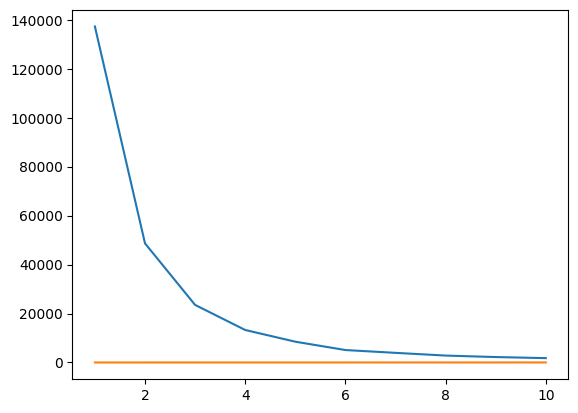

In [28]:
plt.plot(range(1,11), inertia_scores)

In [35]:
#Bivariate

clustering_2 = KMeans()
clustering_2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Sp_An_df'] = clustering_2.labels_
df.head()


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Sp_An_df
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,4,4
2,3,Female,20,16,6,4,2
3,4,Female,23,16,77,4,4
4,5,Female,31,17,40,4,2


In [46]:
from sklearn.metrics import silhouette_score

inertia_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Sp_An_df']])
    sil = silhouette_score(df[['Sp_An_df']], kmeans.labels_)
    inertia_scores.append((kmeans.inertia_,i,sil))

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

In [47]:
inertia_scores

[(253.7168141592922, 2, 0.709616901623559),
 (107.19083820662767, 3, 0.6950600106197455),
 (43.02566752799309, 4, 0.7463516087073991),
 (26.22566752799308, 5, 0.8172282848553064),
 (14.09375, 6, 0.8774467437614122),
 (6.875, 7, 0.9290322580645162),
 (7.2496317189810985e-28, 8, 1.0),
 (6.121560624515052e-28, 9, 1.0),
 (6.121560624515052e-28, 10, 1.0)]

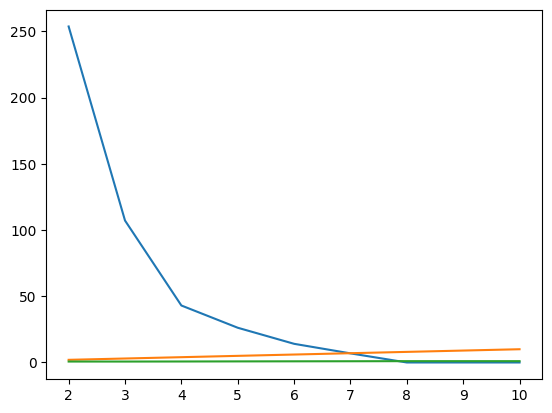

In [39]:
plt.plot(range(2,11), inertia_scores)

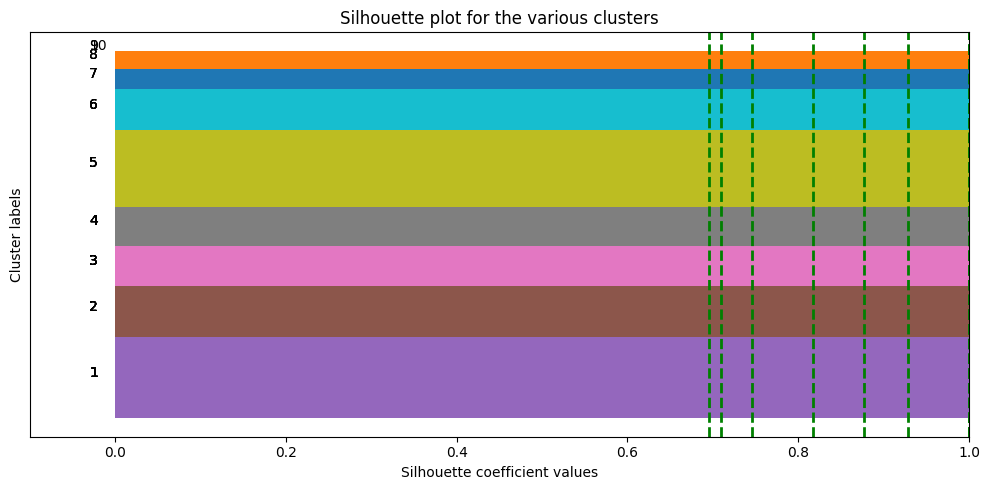

In [41]:
from sklearn.metrics import silhouette_samples

plt.figure(figsize=(10, 5))

# Iterate over the silhouette scores
for inertia, k, silhouette_score_value in inertia_scores:
    # Calculate silhouette values for each data point
    silhouette_vals = silhouette_samples(df[['Sp_An_df']], kmeans.labels_)

    # Sort silhouette values for each cluster
    y_ticks = []
    y_lower = y_upper = 0

    for j in range(k):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == j]
        cluster_silhouette_vals.sort()

        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)

        # Add cluster label
        plt.text(-0.03, (y_lower + y_upper) / 2, str(j + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score
    avg_score = silhouette_score_value

    # Add a vertical line representing the average silhouette score
    plt.axvline(avg_score, linestyle='--', linewidth=2, color='green')

# Set plot properties
plt.yticks([])  # Remove y-axis ticks
plt.xlim([-0.1, 1])
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.title('Silhouette plot for the various clusters')

plt.tight_layout()
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

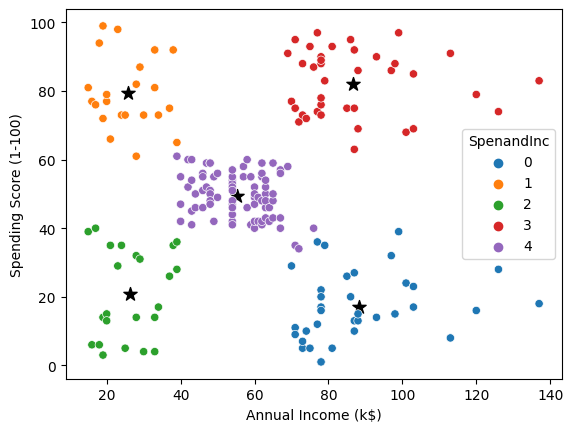

In [55]:
clustering_2 = KMeans(n_clusters=5)
clustering_2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['SpenandInc'] = clustering_2.labels_
df.head()

centers =pd.DataFrame(clustering_2.cluster_centers_)
centers.columns = ['x','y']

plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='SpenandInc',palette='tab10')

Multivariate Analysis

In [57]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
